Clustering is concerned about grouping objects with *similar attributes* or *characteristics*.  The objects in the same cluster are closer to one another than the objects from the other clusters.



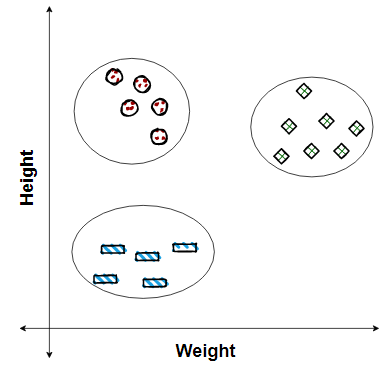

In the image above, the clusters with same colour share similar properties (feature values represented on axis). For instance, if the x-axis represents weight and y-axis represent height, then the red cluster represents people with low BMI. Similar interpretations can be drawn for the remaining clusters.

Earlier in this week, we studied k-means clustering algorithm.  In this colab we will discuss another clustering algorithm which is **hierarchical agglomerative clustering** (HAC) algorithm. 

* Hierarchial clustering starts by considering each datum as a cluster and then combines closest clusters to form larger clusters. This is bottoms up approach.

* There is an alternate approach, which is top-down approach, where the entire data is considered as a one single cluster, which is divided to form smaller clusters in each step.

The merging and splitting decisions are influenced by certain conditions that will be discussed shortly.

Metric

Certain metrics are used for calculating similarity between clusters.  Note that metric is a generalization of concept of distance. The metrics follow certain properties like

(i) non-negative

(ii) sysmetric

(iii) follows triangle inequality



Some of the popular metric function are:


1.   **Euclidean** - 

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   \sqrt[]{\sum_{l=1}^{m} (\mathbf{x}_l^{(i)}-\mathbf{x}_l^{(j)})^2} $
 
2.   **Manhattan** -

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   {\sum_{l=1}^{m} \vert(\mathbf{x}_l^{(i)}-\mathbf{x}_l^{(j)})}\vert $

3.   **Cosine distance** -

 > $ d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) =   1 - \frac{\mathbf{x}^{(i)} . \mathbf{x}^{(j)}} {||\mathbf{x}^{(i)}|| \ ||\mathbf{x}^{(j)}||}  = 1-cos(\theta) $



### Linkage

Linkage is a strategy for aggregating clusters.

There are four linkages that we will study
* Single linkage
* Average linkage
* Complete linkage
* Ward's linkage

The **Single linkage** criterion merges
clusters based on the shortest distance over all possible pairs. That is


> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \min_{i,j} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$










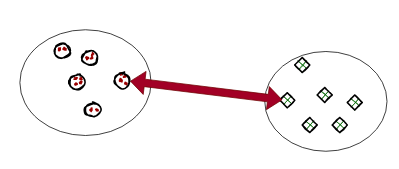

The **complete linkage** merges clusters to minimize the maximum distance between the clusters (in other words, the distance of the furthest elements).

$ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \max_{i,j} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$

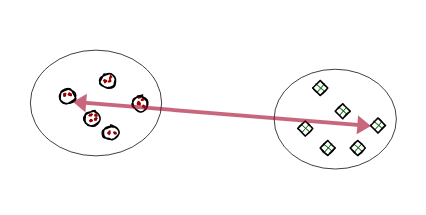

The **average linkage** criterion uses average distance over all possible pairs between the groups for merging clusters

> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) = \frac{1}{|r_1| |r_2|} \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} d(\mathbf{x}_{r_1}^{(i)}, \mathbf{x}_{r_2}^{(j)})$

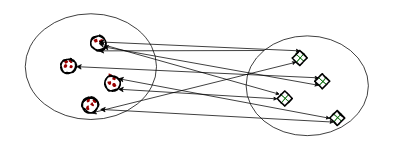

**Ward's linkage**

This computes the sum of squared distances within the clusters.
> $ ( \{\mathbf{x}_{r_1}^{(i)}\}_{i=1}^{|r_1|}, \{\mathbf{x}_{r_2}^{(j)}\}_{j=1}^{|r_2|}) =  \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} ||\mathbf{x}_{r_1}^{(i)} - \mathbf{x}_{r_2}^{(j)} ||^2$

# Hierarchical Agglomerative Clustering

Algorithm:

1. Calculate the distance matrix between 
pairs of clusters.

2. while all the objets are clustered into one.

  2a. Detect the two closest groups (clusters) and merge them.


### Dendrogram

Dendrograms are a graphical representation of the agglomerative process which show a how aggregation happens at each level. Lets take example of a toy dataset to understand this.

### Using a toy-dataset to demostrate the working of HAC

Example:


$x_1$   | $x_2$  
-------------------|------------------
8       | 3
5       | 3
6       | 4
1       | 6
2       | 8







In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

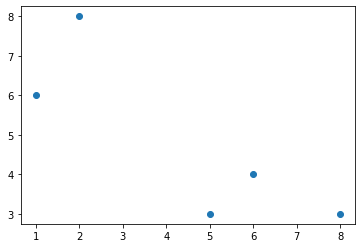

In [2]:
X = np.array([(8,3),(5,3),(6,4),(1,6),(2,8)])
scaled_X = normalize(X)
plt.scatter(X[:,0],X[:,1])
plt.show()

Let's plot the dendrogram with `scipy.cluster.hierarchy` library.

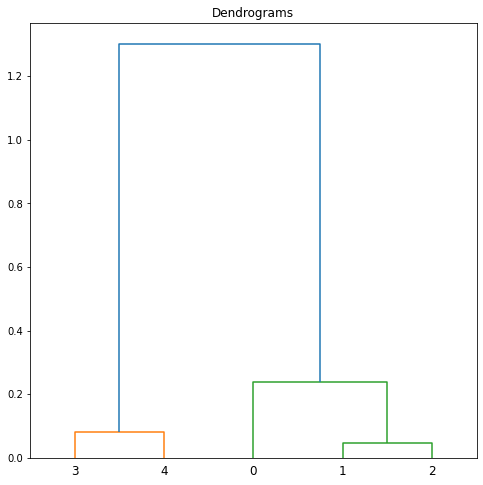

In [3]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

HAC is implemented in `sklearn.cluster` module as `AgglomerativeClustering` class.
